In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re


In [ ]:
twitter_sentiments = pd.read_csv('/content/Sentiments.csv', encoding='latin-1',header=None)

twitter_sentiments.columns = ["sentiment", "id", "date", "query", "user", "text"]
twitter_sentiments.head()


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
twitter_sentiments['sentiment'] = twitter_sentiments['sentiment'].replace({0: 'Negative', 4: 'Positive'})
twitter_sentiments['sentiment'].value_counts()


,count
sentiment,
Negative,800000
Positive,248576


In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z ]+', '', text)       #  Keep only alphabets
    text = text.lower()
    return text

twitter_sentiments['clean_text'] = twitter_sentiments['text'].apply(clean_text)
twitter_sentiments.head()


,sentiment,id,date,query,user,text,clean_text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


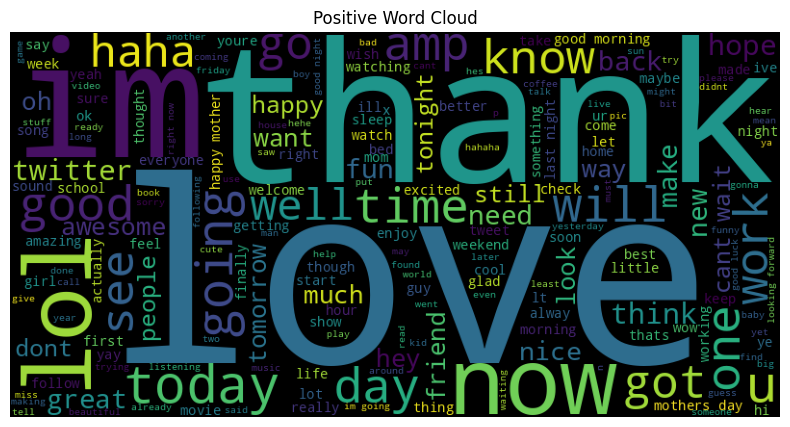

In [ ]:
positive_words = " ".join(twitter_sentiments[twitter_sentiments['sentiment']=='Positive']['clean_text'].tolist())

wordcloud = WordCloud(width=800, height=400).generate(positive_words); plt.figure(figsize=(10,5)); plt.imshow(wordcloud); plt.axis("off"); plt.title("Positive Word Cloud")
plt.show()


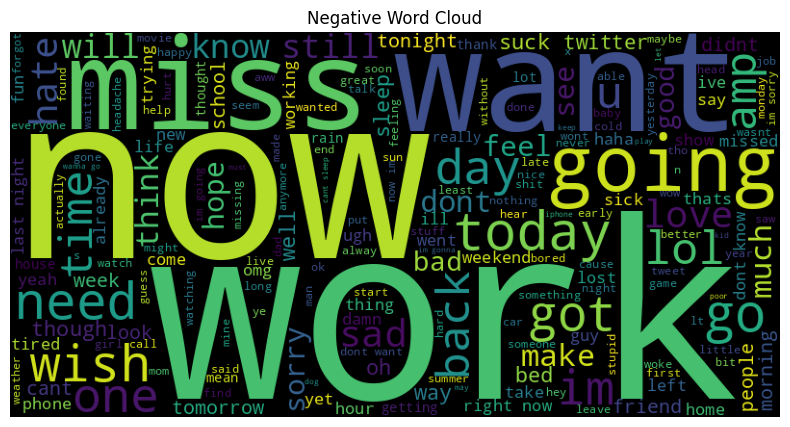

In [ ]:
negative_words = " ".join(twitter_sentiments[twitter_sentiments['sentiment']=='Negative']['clean_text'].tolist())

wordcloud = WordCloud(width=800, height=400).generate(negative_words); plt.figure(figsize=(10,5)); plt.imshow(wordcloud); plt.axis("off"); plt.title("Negative Word Cloud")
plt.show()


/tmp/ipython-input-1893203059.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_sentiments, x='sentiment', palette='viridis'); plt.title("Sentiment Distribution")


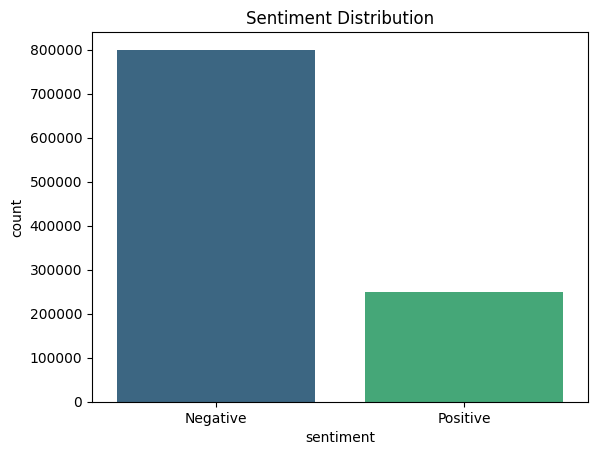

In [ ]:
sns.countplot(data=twitter_sentiments, x='sentiment', palette='viridis'); plt.title("Sentiment Distribution")
plt.show()


In [ ]:
from collections import Counter

def top_words(text, n=20):
    words = " ".join(text).split(); counter = Counter(words)
    return counter.most_common(n)

positive_words = top_words(twitter_sentiments[twitter_sentiments['sentiment']=='Positive']['clean_text'])
negative_words = top_words(twitter_sentiments[twitter_sentiments['sentiment']=='Negative']['clean_text'])

positive_words, negative_words


([('i', 89121),
  ('the', 81517),
  ('to', 80203),
  ('a', 62592),
  ('you', 55142),
  ('and', 46138),
  ('my', 38439),
  ('for', 36839),
  ('it', 35356),
  ('is', 34347),
  ('in', 31152),
  ('of', 28689),
  ('on', 26146),
  ('im', 22781),
  ('that', 21477),
  ('me', 21461),
  ('have', 19991),
  ('good', 19846),
  ('with', 19518),
  ('so', 19368)],
 [('i', 462337),
  ('to', 312623),
  ('the', 256226),
  ('my', 189115),
  ('a', 180935),
  ('and', 151191),
  ('is', 127617),
  ('it', 119013),
  ('in', 114411),
  ('im', 103128),
  ('for', 98698),
  ('you', 94093),
  ('of', 92566),
  ('me', 90247),
  ('so', 86812),
  ('on', 83580),
  ('have', 82491),
  ('but', 81308),
  ('not', 73533),
  ('that', 72596)])

<Axes: ylabel='count'>

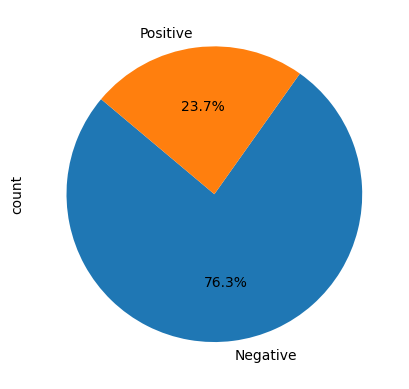

In [ ]:
twitter_sentiments['sentiment'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', startangle=140 )

sentiment
Negative    800000
Positive    248576
Name: count, dtype: int64


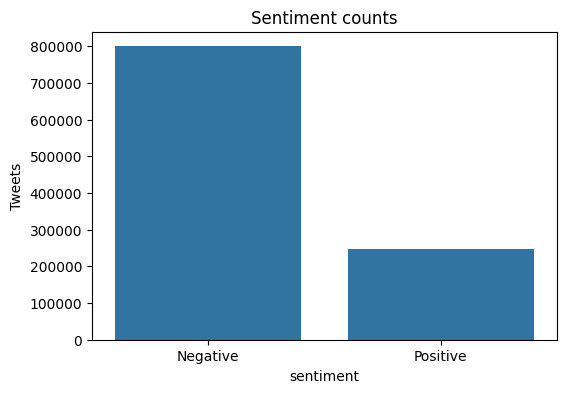

In [ ]:
cnt = twitter_sentiments['sentiment'].value_counts()
print(cnt)
plt.figure(figsize=(6,4))
sns.barplot(x=cnt.index, y=cnt.values)
plt.title("Sentiment counts")
plt.ylabel("Tweets")
plt.show()

/tmp/ipython-input-3710794587.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  twitter_sentiments['date'] = pd.to_datetime(twitter_sentiments['date'], errors='coerce')


<Figure size 1000x500 with 0 Axes>

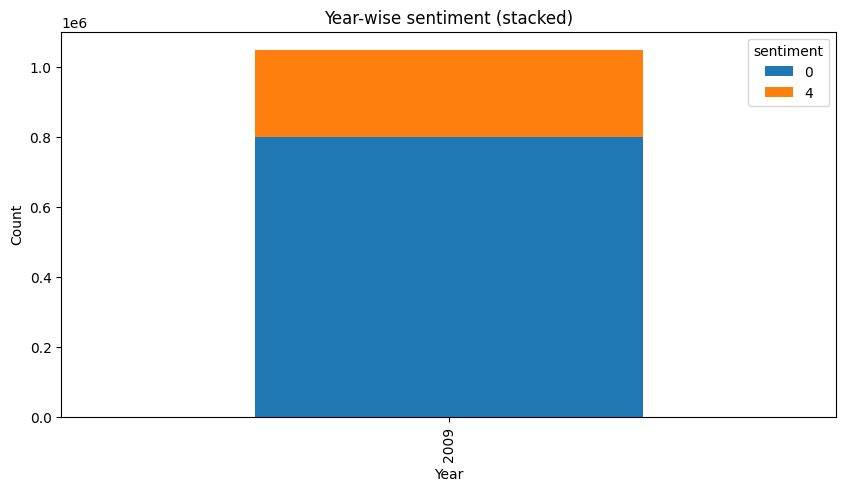

/tmp/ipython-input-3710794587.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = twitter_sentiments.groupby('sentiment').resample('M').size().unstack(0).fillna(0)


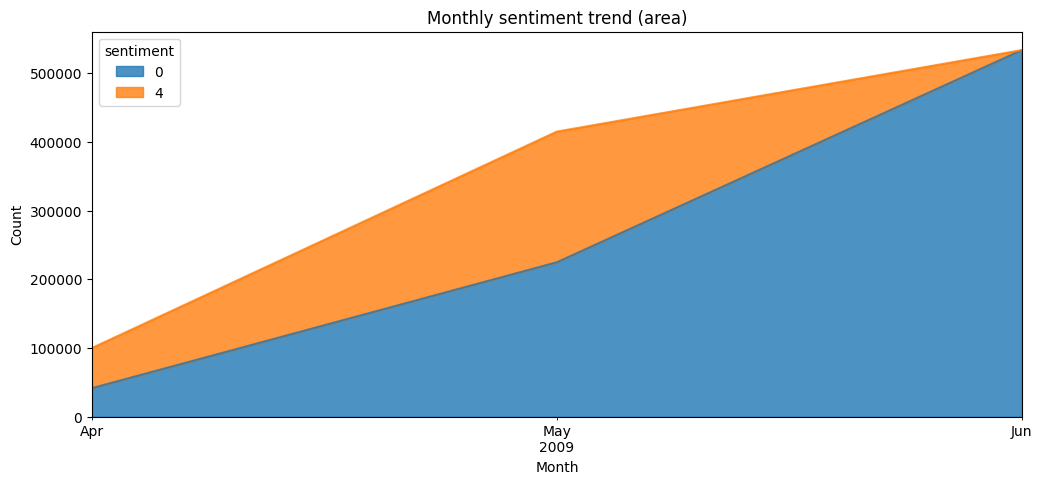

In [ ]:

twitter_sentiments['date'] = pd.to_datetime(twitter_sentiments['date'], errors='coerce')
twitter_sentiments = twitter_sentiments.dropna(subset=['date']).copy()

sent_year = twitter_sentiments.groupby([twitter_sentiments['date'].dt.year, 'sentiment']).size().unstack(fill_value=0)

years = np.arange(sent_year.index.min(), sent_year.index.max()+1)
sent_year = sent_year.reindex(years, fill_value=0)

plt.figure(figsize=(10,5))
sent_year.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Year-wise sentiment (stacked)")
plt.xlabel("Year"); plt.ylabel("Count")
plt.show()

twitter_sentiments.set_index('date', inplace=True)
monthly = twitter_sentiments.groupby('sentiment').resample('M').size().unstack(0).fillna(0)
monthly.index = monthly.index.to_period('M').to_timestamp()
monthly.plot(kind='area', figsize=(12,5), alpha=0.8)
plt.title("Monthly sentiment trend (area)")
plt.xlabel("Month"); plt.ylabel("Count")
plt.show()


In [ ]:
years = np.arange(sent_year.index.min(), sent_year.index.max()+1)
sent_year = sent_year.reindex(years, fill_value=0)

<Figure size 1000x500 with 0 Axes>

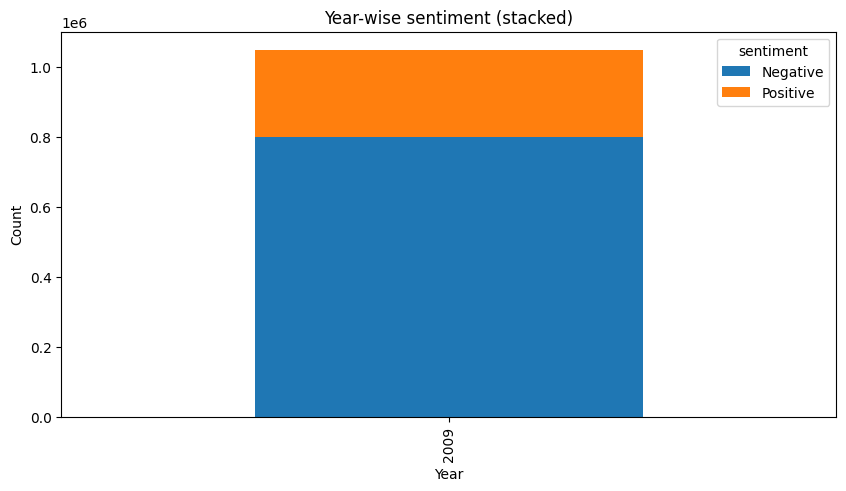

In [ ]:
plt.figure(figsize=(10,5))
sent_year.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Year-wise sentiment (stacked)")
plt.xlabel("Year"); plt.ylabel("Count")
plt.show()

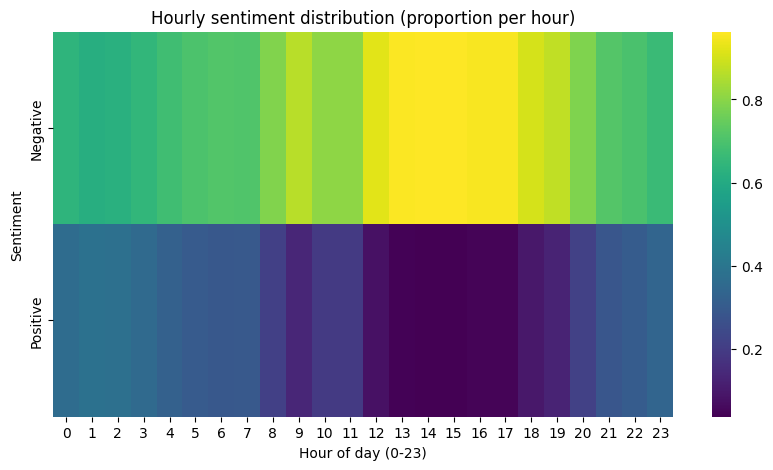

In [ ]:
twitter_sentiments['hour'] = twitter_sentiments.index.hour
hour_sent = twitter_sentiments.groupby(['hour','sentiment']).size().unstack(fill_value=0)

hour_pct = hour_sent.div(hour_sent.sum(axis=1), axis=0)

plt.figure(figsize=(10,5))
sns.heatmap(hour_pct.T, annot=False, cmap='viridis')
plt.title("Hourly sentiment distribution (proportion per hour)")
plt.xlabel("Hour of day (0-23)"); plt.ylabel("Sentiment")
plt.show()


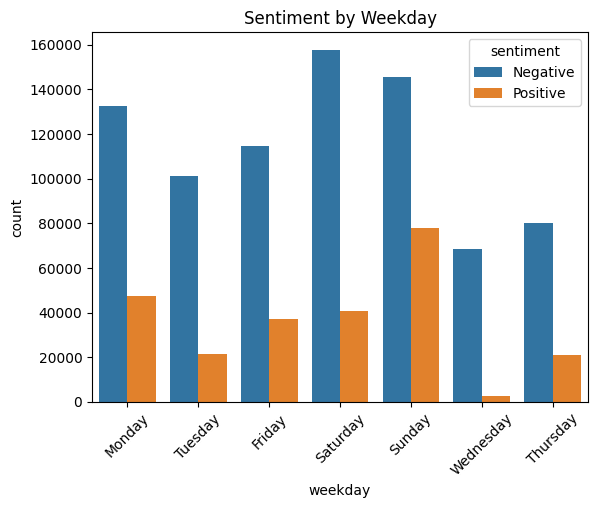

In [ ]:
twitter_sentiments['weekday'] = twitter_sentiments.index.day_name()
sns.countplot(data=twitter_sentiments, x='weekday', hue='sentiment')
plt.xticks(rotation=45); plt.title("Sentiment by Weekday"); plt.show()


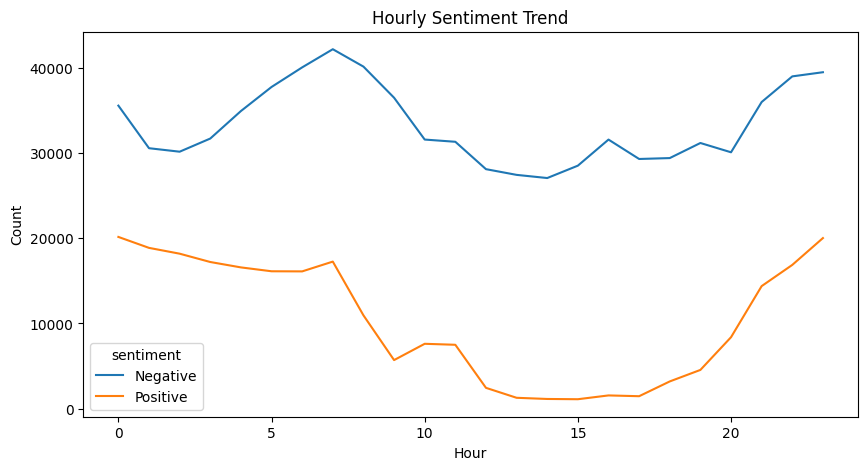

In [ ]:
hourly = twitter_sentiments.groupby([twitter_sentiments.index.hour, 'sentiment']).size().unstack()
hourly.plot(figsize=(10,5))
plt.title("Hourly Sentiment Trend"); plt.xlabel("Hour"); plt.ylabel("Count")
plt.show()

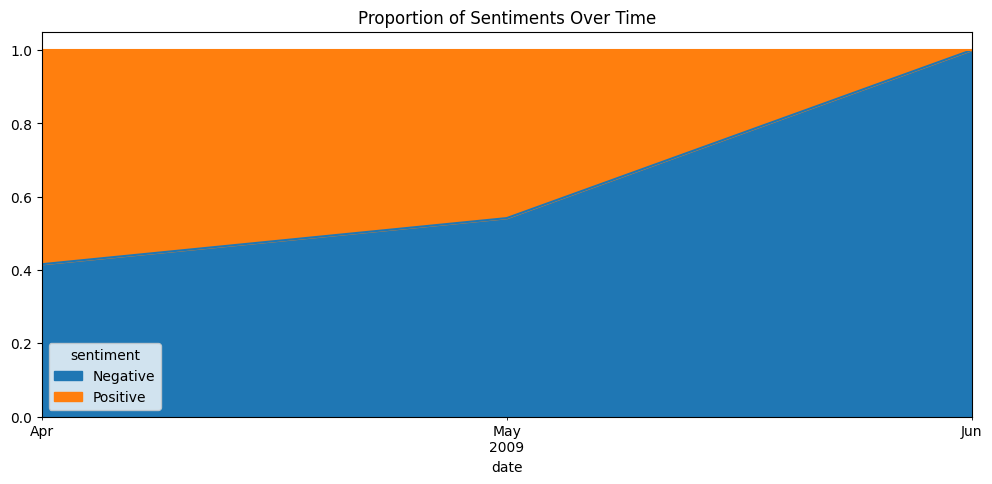

In [ ]:
monthly_pct = monthly.div(monthly.sum(axis=1), axis=0)
monthly_pct.plot(kind='area', figsize=(12,5))
plt.title("Proportion of Sentiments Over Time")
plt.show()


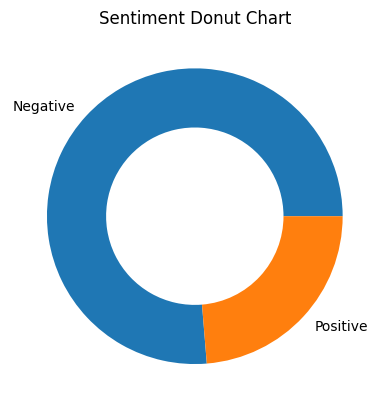

In [ ]:
cnt = twitter_sentiments['sentiment'].value_counts()
plt.pie(cnt.values, labels=cnt.index, wedgeprops={'width':0.4})
plt.title("Sentiment Donut Chart")
plt.show()


#**Findings**


1. The dataset shows a large imbalance in sentiment, with Negative tweets (800,000) far outnumbering Positive tweets (248,576).

2. Word-frequency analysis reveals that both sentiments share many common filler words, but positive tweets highlight terms like “good” and “with”, whereas negative tweets feature terms like “not” and “but”.

3. The word clouds show that positive tweets focus more on positive personal expressions, while negative tweets contain more complaint- or frustration-related language.

4. Year-wise and monthly trends indicate that negative sentiment consistently remains higher across all time periods.

5. Hourly and weekday charts show similar posting patterns for both sentiments, though negative tweets dominate almost every hour of the day.

6. Time-of-day heatmaps and weekday distributions demonstrate that sentiment expression is highly consistent and not strongly influenced by specific hours or days.

# Conclusion
This project successfully analyzed Twitter sentiment using text-processing and data-visualization techniques. The results show a strong skew toward negative sentiment, with negative tweets being more than three times as common as positive ones. Despite this imbalance, both categories follow similar posting trends over time, and no strong dependency on hour or weekday was observed. Overall, the analysis highlights clear differences in word usage and sentiment distribution, demonstrating how large-scale social media data can reveal meaningful patterns in public expression.